# 0. Transfer and concat the data 

This is a project from my masters' course to predict wine quality. The data sets are vey commonly used and I just want to demonstrate the team how I manipulate data sets, tune models and draw the conclusion.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
red_wine_path = "./winequality-red.csv"
white_wine_path = "./winequality-white.csv"

red_wine = pd.read_csv(red_wine_path, sep = ";", header = 0)
white_wine = pd.read_csv(white_wine_path, sep = ";", header = 0)

In [5]:
red_wine.insert(red_wine.shape[1]-1, "type", 0) # "0" in type means red wine
red_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0,5


In [6]:
white_wine.insert(white_wine.shape[1]-1, "type", 1) # "1" in type means white wine
white_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,1,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,1,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,1,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,1,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,1,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1,7


In [7]:
from sklearn.utils import shuffle
df = pd.concat([red_wine, white_wine], ignore_index=True) # concat the two df of red/white wine 
df = shuffle(df) # shuffle the df
df.reset_index(inplace = True, drop = True) # reset index in ascending 
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
0,6.9,0.58,0.01,1.90,0.080,40.0,54.0,0.99683,3.40,0.73,9.7,0,5
1,9.8,0.34,0.39,1.40,0.066,3.0,7.0,0.99470,3.19,0.55,11.4,0,7
2,6.2,0.30,0.32,1.30,0.054,27.0,183.0,0.99266,3.30,0.43,10.1,1,5
3,7.1,0.12,0.30,3.10,0.018,15.0,37.0,0.99004,3.02,0.52,11.9,1,7
4,6.5,0.44,0.47,5.45,0.014,44.0,137.0,0.98984,3.13,0.32,13.0,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,5.1,0.35,0.26,6.80,0.034,36.0,120.0,0.99188,3.38,0.40,11.5,1,6
6493,7.6,0.21,0.44,1.90,0.036,10.0,119.0,0.99130,3.01,0.70,12.8,1,6
6494,6.4,0.25,0.33,1.70,0.037,35.0,113.0,0.99164,3.23,0.66,10.6,1,6
6495,6.4,0.29,0.44,3.60,0.197,75.0,183.0,0.99420,3.01,0.38,9.1,1,5


# 1. Explore and analyze and variables

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
#check if there's any missing values
print(df.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
type                    0
quality                 0
dtype: int64


## 1.1 Variable analytics

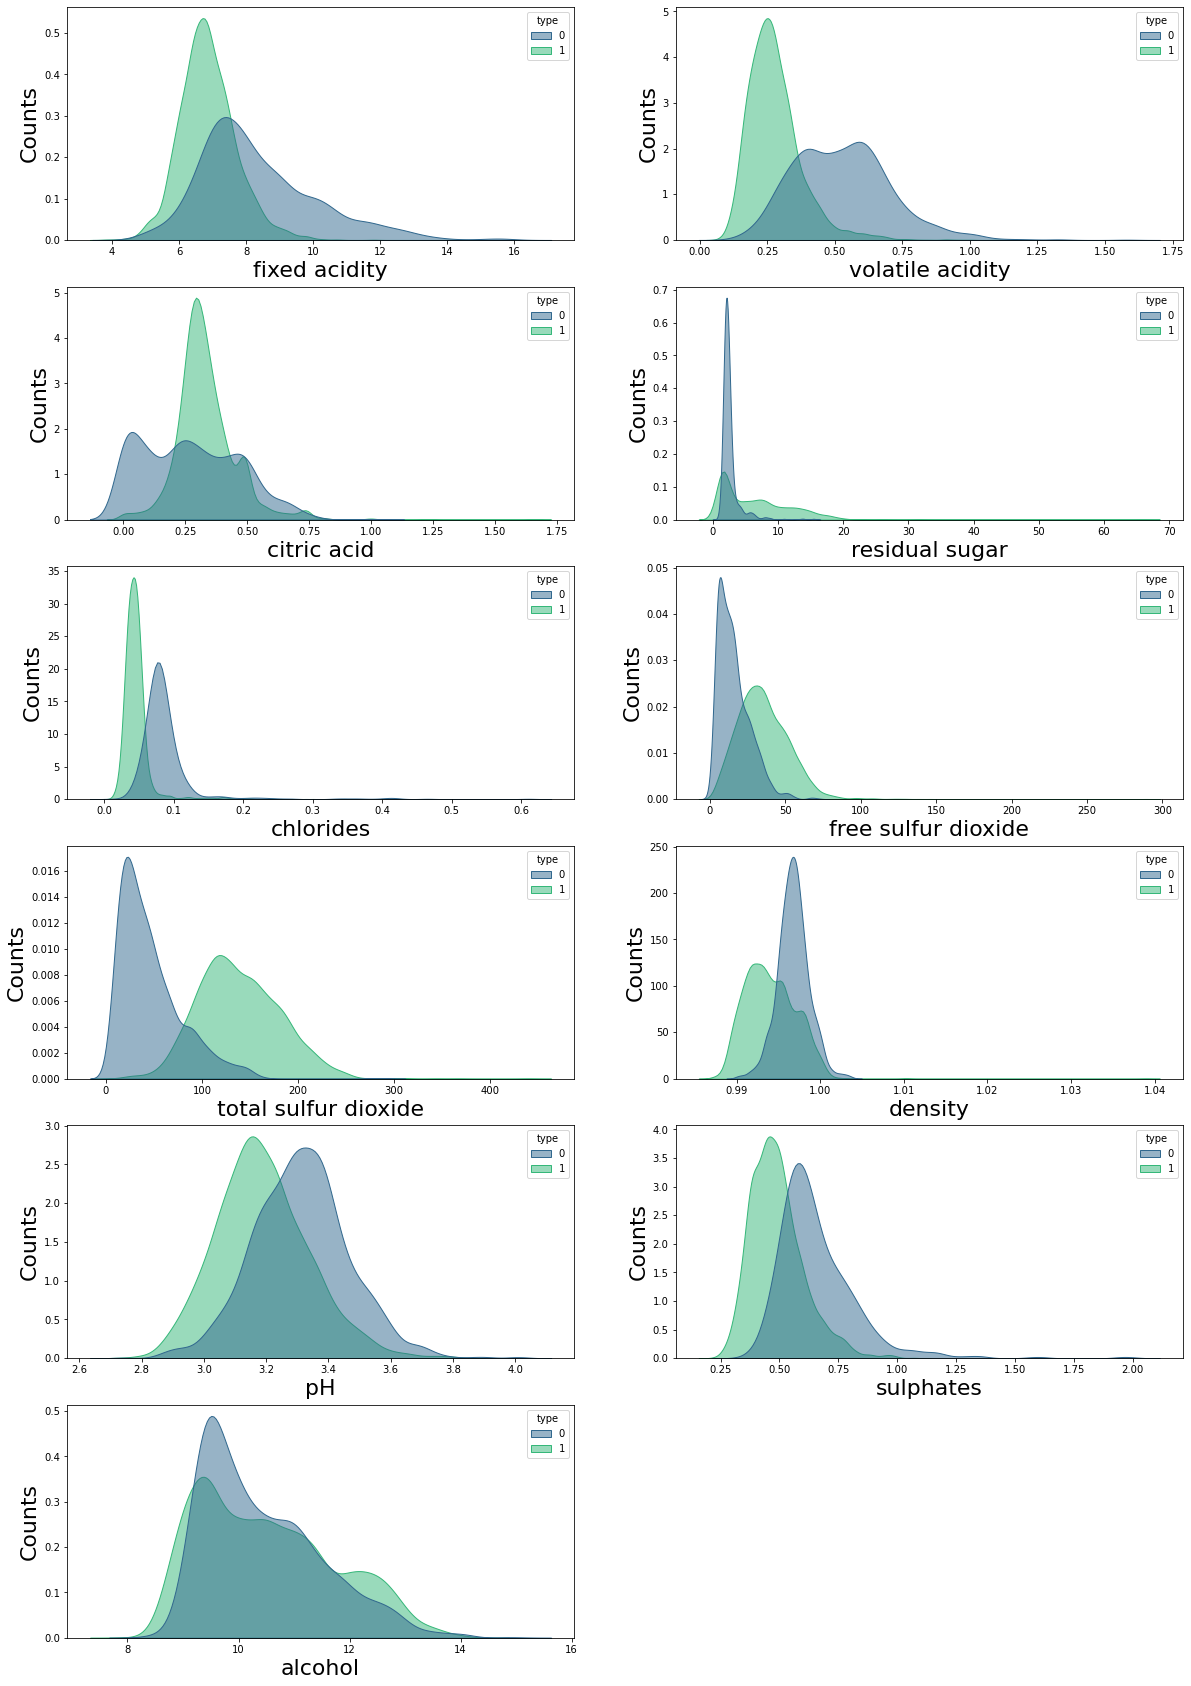

In [10]:
# Distribution of input variables
plt.figure(figsize=(20,30))
for i, variable in enumerate(df.columns[:-2]):
    
    # Set up the plot
    ax = plt.subplot(6, 2, i + 1)

    # Draw the plot   
    ax = sns.kdeplot(
           df[variable], hue=df["type"],
           fill=True, common_norm=False, palette="viridis",
           alpha=.5, linewidth=1
        )

    # Title and labels
    ax.set_xlabel(variable, size = 22)
    ax.set_ylabel('Counts', size= 22)

plt.show()

It can be seen that most red wines’ pH levels are always between 3–4 and <br/>
chlorides — the amount of salt is most prevalent at level 0.5. <br/>

<AxesSubplot:xlabel='quality', ylabel='Count'>

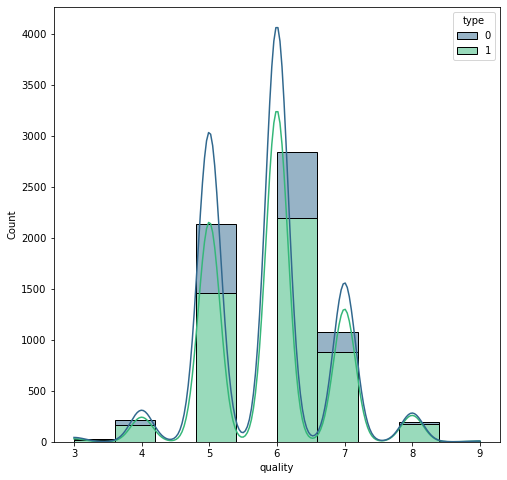

In [11]:
#quality analytics
plt.figure(figsize=(8,8))
sns.histplot(data=df, x="quality", hue="type", 
             bins = 10, kde = True,
             stat = "count", multiple="stack", 
             palette="viridis")

Quality data are concentrated in three level: 5, 6, 7 <br/>
For both red wine and white wine, their distribution have high similarity <br/>
According to these 3 peaks, we can seperate wine's quality into 3 level: <br/>
low: quality < 5 <br/>
medium: 5 <= quality < 7 <br/>
high >= 7

After analyzing the density plots, I plotted the interaction between our numeric variables of interest <br/>
and our dependent variable: quality.

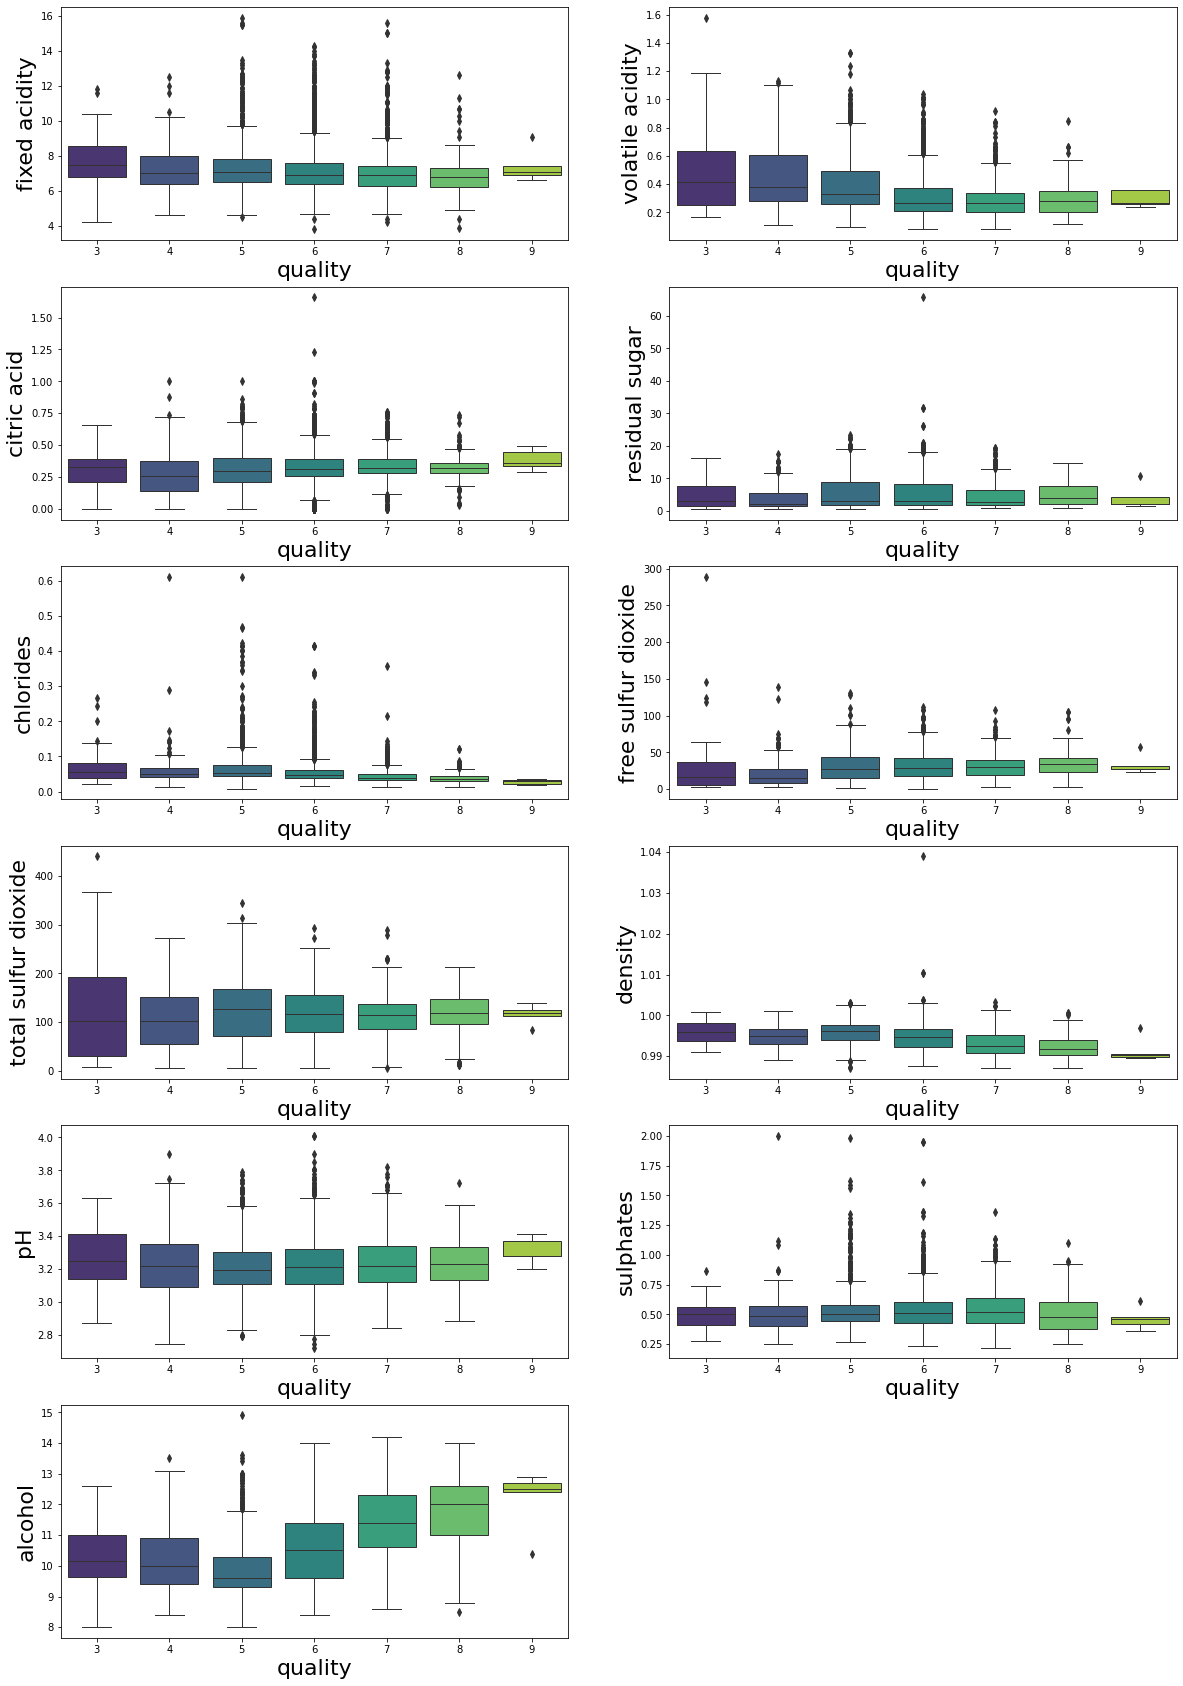

In [12]:
# boxplot of input variables and quality
plt.figure(figsize=(20,30))
for i, variable in enumerate(df.columns[:-2]):
    
    # Set up the plot
    ax = plt.subplot(6, 2, i + 1)

    # Draw the plot   
    ax = sns.boxplot(x = df["quality"], y = df[variable], data = df, linewidth = 1, palette="viridis")

    # Title and labels
    ax.set_xlabel("quality", size = 22)
    ax.set_ylabel(variable, size= 22)

plt.show()

Three different patterns can be observed. <br/>

First, there are positive relationships between quality and critic.acid, alcohol, and sulphates. Even though wines with a higher level of alcohol may make them less popular, they should be highly rated in quality. <br/>

Second, there are negative relationships between quality and volatile.acidity, density. It is reasonable that less sweet wines and a lower level of acidity are favored in quality testings. <br/>

Last, these independent variables show no significant relationship with quality: residual.sugar, chlorides, pH, and total.sulfur.dioxide.<br/>

## 1.2 Variable correlation analytics

<AxesSubplot:>

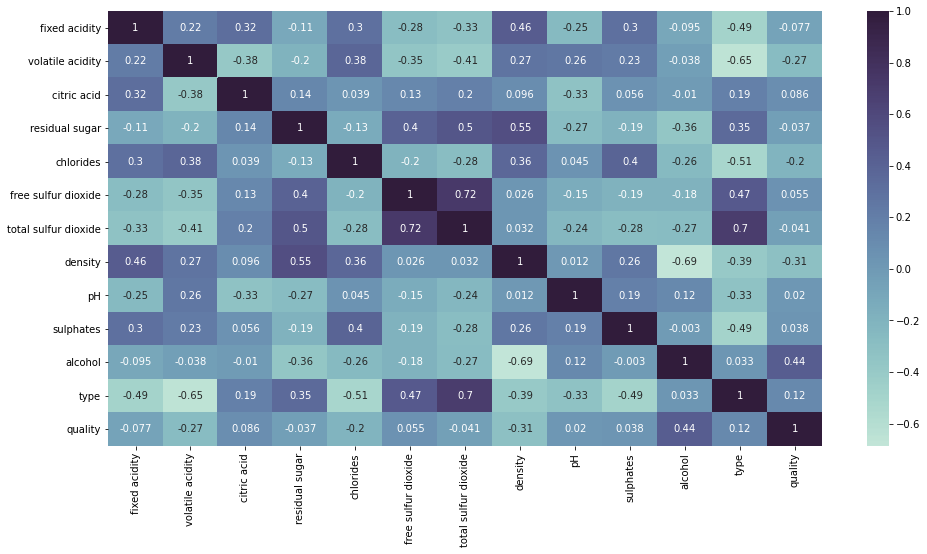

In [13]:
plt.subplots(figsize=(16,8))
sns.heatmap(df.corr(), xticklabels=df.columns, yticklabels=df.columns, annot=True, 
            cmap=sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True))

In the order of high to low correlation, these variables are:
- 1. Alcohol 0.44: the amount of alcohol in wine
- 2. Density -0.31: sweeter wines have a higher density
- 3. Volatile acidity -0.27: high acetic acid in wine which leads to an unpleasant vinegar taste
- 4. Chlorides -0.2: the amount of salt in the wine
- 5. Citric Acid 0.086: acts as a preservative to increase acidity (small quantities add freshness and flavor to wines)
- 6. Fixed acidity -0.077: are non-volatile acids that do not evaporate readily
- 7. Free Sulfur Dioxide 0.055: it prevents microbial growth and the oxidation of wine
- 8. Total Sulfur Dioxide -0.041: is the amount of free + bound forms of SO2
- 9. Sulphates 0.038: a wine additive that contributes to SO2 levels and acts as an antimicrobial and antioxidant
- 10. Residual sugar -0.037: is the amount of sugar remaining after fermentation stops. The key is to have a perfect balance between — sweetness and sourness (wines > 45g/ltrs are sweet)
- 11. pH 0.02: the level of acidity

# 2.Modeling -Random Forest

## 2.1 Modeling

In this modeling we predict the data in two ways: predict quality by it's original numeric value, and predict by labeled value(low, medium, high). Obviously the labeling method will achieve high accuracy since it do the job more roughly. The comparison is to show how much accuracy will be improved if the customers prefer a less detailed prediction output.

In [14]:
import copy
from sklearn import metrics
df_score = copy.deepcopy(df)
df_modified = copy.deepcopy(df)

In [1]:
# important step for intalling third-party package
# conda install -c conda-forge scikit-plot
# import scikitplot as skplt

In [15]:
#label the quality(predict variant)
def apply_quality(quality):
    if quality < 5:
        return "Low"
    elif quality >= 5 and quality < 7:
        return "Medium"
    else:
        return "High"

df_modified["quality"] = df_modified["quality"].apply(apply_quality)

In [16]:
df_score

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
0,6.9,0.58,0.01,1.90,0.080,40.0,54.0,0.99683,3.40,0.73,9.7,0,5
1,9.8,0.34,0.39,1.40,0.066,3.0,7.0,0.99470,3.19,0.55,11.4,0,7
2,6.2,0.30,0.32,1.30,0.054,27.0,183.0,0.99266,3.30,0.43,10.1,1,5
3,7.1,0.12,0.30,3.10,0.018,15.0,37.0,0.99004,3.02,0.52,11.9,1,7
4,6.5,0.44,0.47,5.45,0.014,44.0,137.0,0.98984,3.13,0.32,13.0,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,5.1,0.35,0.26,6.80,0.034,36.0,120.0,0.99188,3.38,0.40,11.5,1,6
6493,7.6,0.21,0.44,1.90,0.036,10.0,119.0,0.99130,3.01,0.70,12.8,1,6
6494,6.4,0.25,0.33,1.70,0.037,35.0,113.0,0.99164,3.23,0.66,10.6,1,6
6495,6.4,0.29,0.44,3.60,0.197,75.0,183.0,0.99420,3.01,0.38,9.1,1,5


In [17]:
df_modified

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
0,6.9,0.58,0.01,1.90,0.080,40.0,54.0,0.99683,3.40,0.73,9.7,0,Medium
1,9.8,0.34,0.39,1.40,0.066,3.0,7.0,0.99470,3.19,0.55,11.4,0,High
2,6.2,0.30,0.32,1.30,0.054,27.0,183.0,0.99266,3.30,0.43,10.1,1,Medium
3,7.1,0.12,0.30,3.10,0.018,15.0,37.0,0.99004,3.02,0.52,11.9,1,High
4,6.5,0.44,0.47,5.45,0.014,44.0,137.0,0.98984,3.13,0.32,13.0,1,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,5.1,0.35,0.26,6.80,0.034,36.0,120.0,0.99188,3.38,0.40,11.5,1,Medium
6493,7.6,0.21,0.44,1.90,0.036,10.0,119.0,0.99130,3.01,0.70,12.8,1,Medium
6494,6.4,0.25,0.33,1.70,0.037,35.0,113.0,0.99164,3.23,0.66,10.6,1,Medium
6495,6.4,0.29,0.44,3.60,0.197,75.0,183.0,0.99420,3.01,0.38,9.1,1,Medium


In [18]:
from sklearn.model_selection import train_test_split
y_score = df_score["quality"]
X_score = df_score.drop(["quality"], axis=1)

y_modified = df_modified["quality"]
X_modified = df_modified.drop(["quality"], axis=1)

# Split 70% of the data for training and leave out 30% for testing
X_score_train, X_score_test, y_score_train, y_score_test = train_test_split(X_score, y_score, test_size=0.3, random_state=42)

X_modified_train, X_modified_test, y_modified_train, y_modified_test = train_test_split(X_modified, y_modified, test_size=0.3, random_state=42)

In [19]:
# RANDOM FOREST MODELING
# 1. SCALE DATA
import numpy as np
from sklearn.preprocessing import StandardScaler
#for score prediction
ss1 = StandardScaler()
X_score_train_scaled = ss1.fit_transform(X_score_train)
X_score_test_scaled = ss1.transform(X_score_test)
y_score_train = np.array(y_score_train)
y_score_test = np.array(y_score_test)

#for modified prediction
ss2 = StandardScaler()
X_modified_train_scaled = ss1.fit_transform(X_modified_train)
X_modified_test_scaled = ss1.transform(X_modified_test)
y_modified_train = np.array(y_modified_train)
y_modified_test = np.array(y_modified_test)

In [20]:
# 2. FIT TO RANDOMFOREST WITH FULL FEATURES
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score

rf1 = RandomForestClassifier()
rf1.fit(X_score_train_scaled, y_score_train)
display(rf1.score(X_score_test_scaled, y_score_test))

0.678974358974359

Accuracy of score prediction RF model is 68.92%

In [239]:
rf2 = RandomForestClassifier()
rf2.fit(X_modified_train_scaled, y_modified_train)
display(rf2.score(X_modified_test_scaled, y_modified_test))

0.8492307692307692

Accuracy of modified label prediction RF model is 86.10%, which is much better than 69.28%.<br/>
thus we can see after we reduced the label number for classfication, the model performance is largly improved

## 2.2 Evaluation

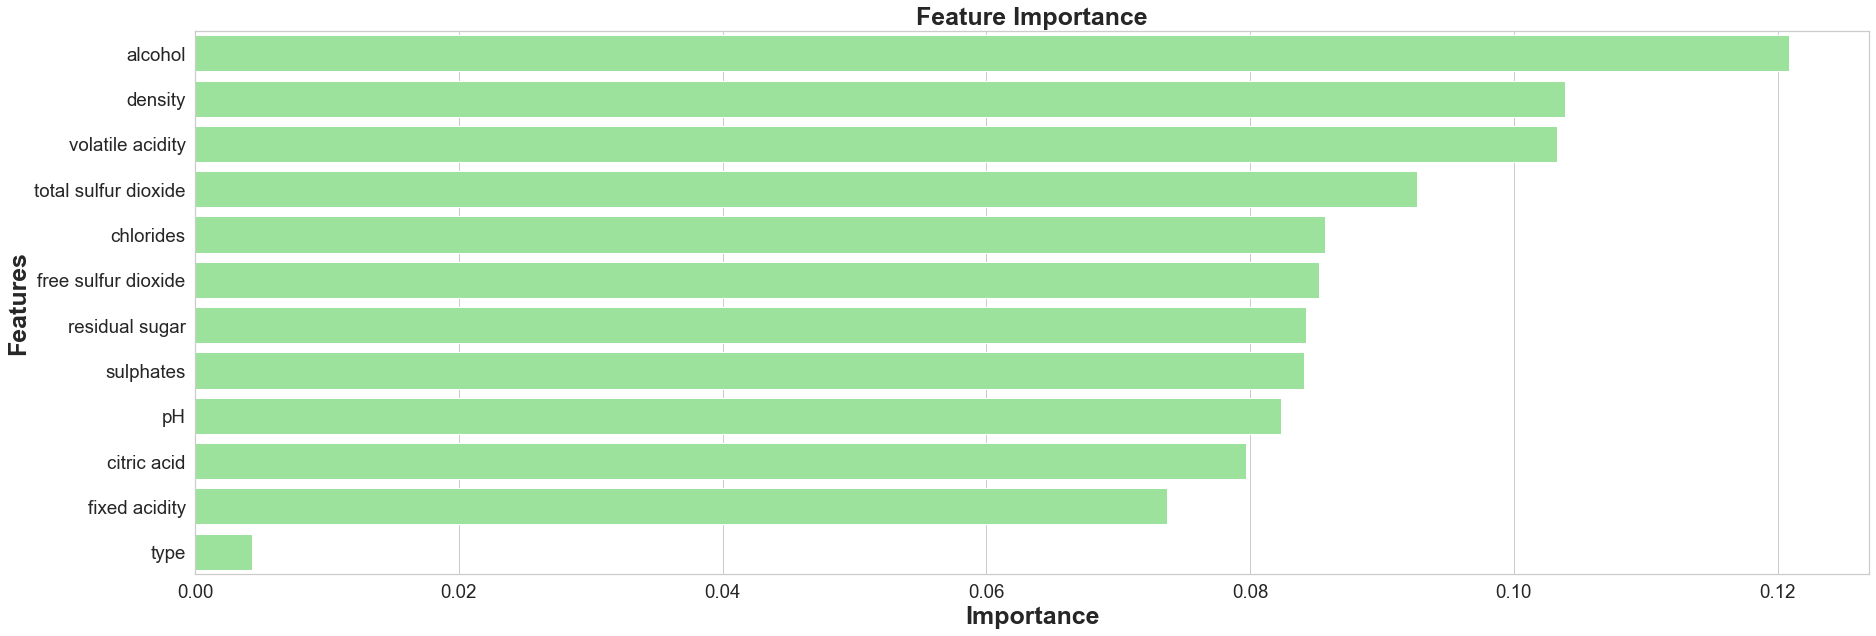

None

,Features,Gini-Importance
0,alcohol,0.120901
1,density,0.103887
2,volatile acidity,0.103268
3,total sulfur dioxide,0.092683
4,chlorides,0.085702
5,free sulfur dioxide,0.085230
6,residual sugar,0.084247
7,sulphates,0.084086
8,pH,0.082347
9,citric acid,0.079683


In [240]:
# demonstrate feature importance for score prediction
dict = {}
for feature, importance in zip(df_score.columns, rf1.feature_importances_):
    dict[feature] = importance
# use Gini index to define our importance
importances = pd.DataFrame.from_dict(dict, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
# plot as barplot
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,10)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='lightgreen')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

The contribution of the features mostly in accordance with the correlation matrix in 1.2

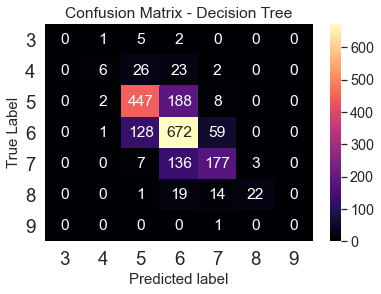

<Figure size 720x504 with 0 Axes>

In [241]:
test_pred_random_forest = rf1.predict(X_score_test_scaled)
#get the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_score_test,  
                                            test_pred_random_forest, labels = [3, 4, 5, 6, 7, 8, 9])
#turn this into a dataframe
matrix_df = pd.DataFrame(confusion_matrix)
#plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")
#set axis titles
ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_xticklabels([3, 4, 5, 6, 7, 8, 9], rotation = 0)
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels([3, 4, 5, 6, 7, 8, 9], rotation = 0)
plt.show()

High prediction Accuracy occurs in quality among 5-7  

In [242]:
print(metrics.classification_report(y_score_test,
                                    test_pred_random_forest))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         8
           4       0.60      0.11      0.18        57
           5       0.73      0.69      0.71       645
           6       0.65      0.78      0.71       860
           7       0.68      0.55      0.61       323
           8       0.88      0.39      0.54        56
           9       0.00      0.00      0.00         1

    accuracy                           0.68      1950
   macro avg       0.50      0.36      0.39      1950
weighted avg       0.68      0.68      0.67      1950



D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Populating the interactive namespace from numpy and matplotlib


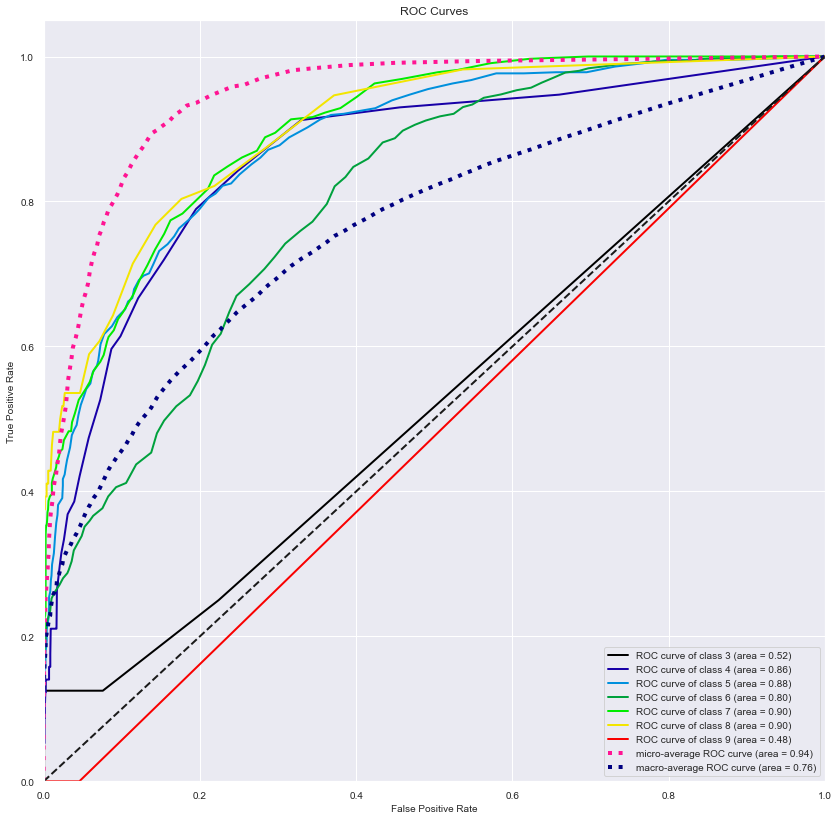

In [307]:
probas = rf1.predict_proba(X_score_test_scaled)

# Now plot.
%pylab inline
pylab.rcParams['figure.figsize'] = (14, 14)
skplt.metrics.plot_roc(y_score_test, probas)
plt.show()

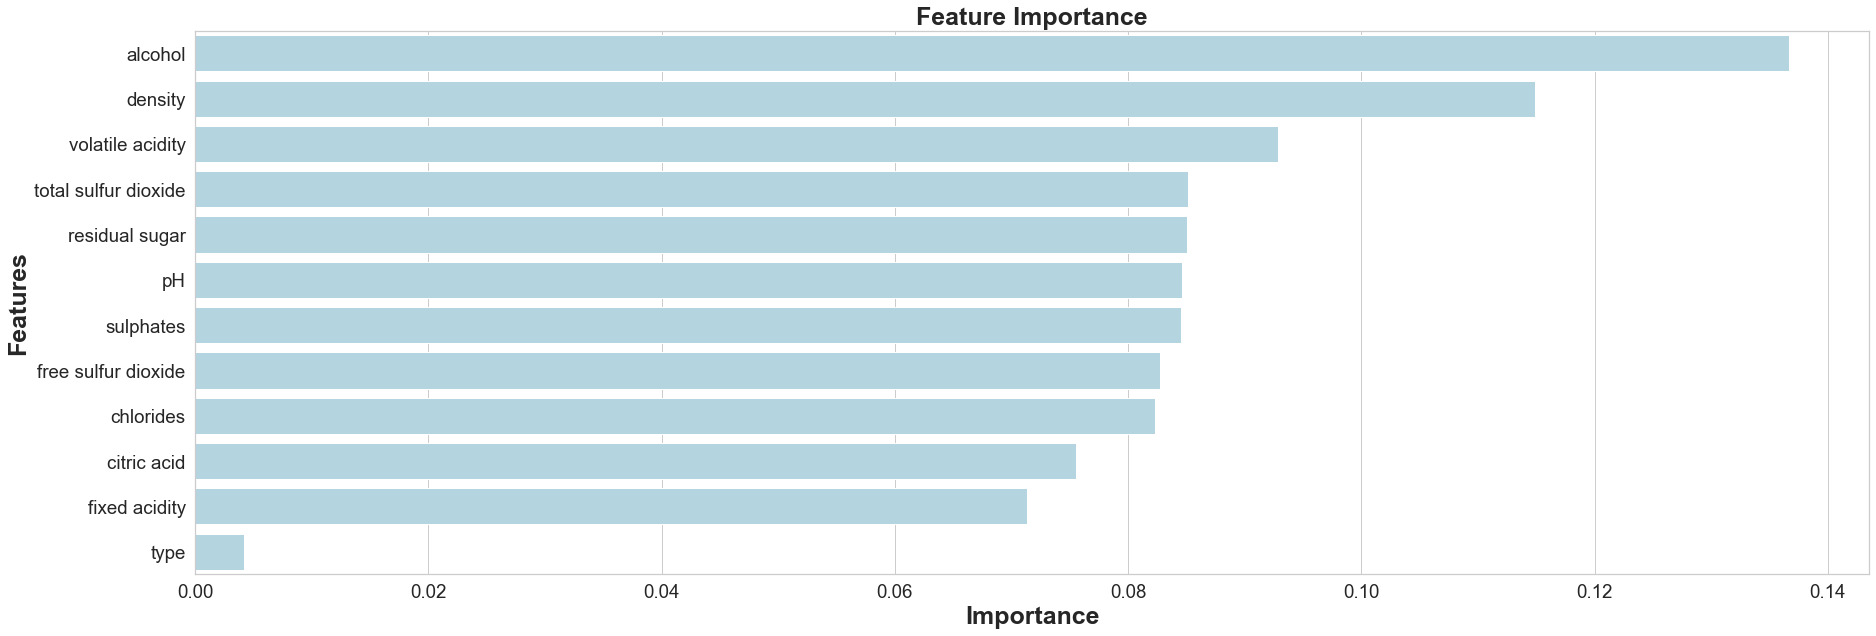

None

,Features,Gini-Importance
0,alcohol,0.136711
1,density,0.114897
2,volatile acidity,0.092819
3,total sulfur dioxide,0.085142
4,residual sugar,0.085090
5,pH,0.084629
6,sulphates,0.084558
7,free sulfur dioxide,0.082702
8,chlorides,0.082329
9,citric acid,0.075564


In [243]:
# demonstrate feature importance for modified label prediction
dict = {}
for feature, importance in zip(df_modified.columns, rf2.feature_importances_):
    dict[feature] = importance
# use Gini index to define our importance
importances = pd.DataFrame.from_dict(dict, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
# plot as barplot
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,10)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='lightblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

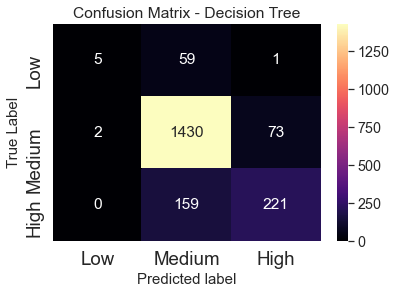

<Figure size 720x504 with 0 Axes>

In [244]:
test_pred_random_forest = rf2.predict(X_modified_test_scaled)
#get the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_modified_test,  
                                            test_pred_random_forest, labels = ["Low", "Medium", "High"])
#turn this into a dataframe
matrix_df = pd.DataFrame(confusion_matrix)
#plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")
#set axis titles
ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_xticklabels(["Low", "Medium", "High"])
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(["Low", "Medium", "High"])
plt.show()

In [245]:
print(metrics.classification_report(y_modified_test,
                                    test_pred_random_forest))

              precision    recall  f1-score   support

        High       0.75      0.58      0.65       380
         Low       0.71      0.08      0.14        65
      Medium       0.87      0.95      0.91      1505

    accuracy                           0.85      1950
   macro avg       0.78      0.54      0.57      1950
weighted avg       0.84      0.85      0.83      1950



Populating the interactive namespace from numpy and matplotlib


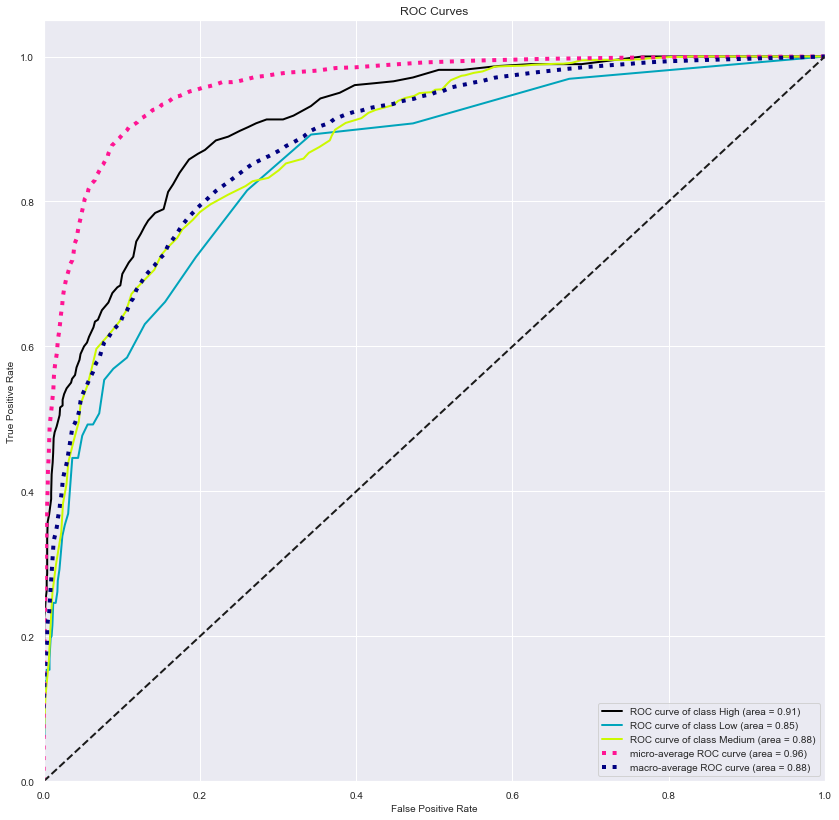

In [306]:
probas = rf2.predict_proba(X_modified_test_scaled)

# Now plot.
%pylab inline
pylab.rcParams['figure.figsize'] = (14, 14)
skplt.metrics.plot_roc(y_modified_test, probas)
plt.show()

to achieve a better performance, we will try PCA to reduce the feature number and see how the performance changes

## 2.3 Improvement -PCA -Dimansion compression

PCA compresses the data set with control of prediction accuracy. It is useful when we are using a heavily training model(with large data input for training) <br/>

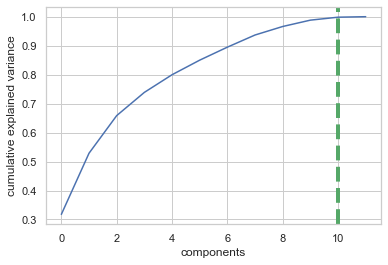

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.317694,0.317694
1,0.528689,0.210995
2,0.658547,0.129858
3,0.738732,0.080185
4,0.799634,0.060903
5,0.849981,0.050347
6,0.894856,0.044875
7,0.936801,0.041945
8,0.966182,0.029381
9,0.988088,0.021906


In [24]:
from sklearn.decomposition import PCA
# since both training data sets are the same, we just check # of components by one of them 
pca_test = PCA(n_components=12) # number of our inpuit features
pca_test.fit(X_score_train_scaled) # based on our training data set
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='g', linestyle = '--', x=10, ymin=0, ymax=1)
display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(12))

it shows reduce our features to 10, the dataset still explains 99.8% of the variance. <br/>
The remaining features have less than 1% importance to help our prediction. <br/>
Thus we are gonna cut the number of features down to 10.

In [273]:
# by PCA, we create 10 new features(components) which is a weighted-linear combination of our original features

pca = PCA(n_components=10) # set as 10 components
pca.fit(X_score_train_scaled) # fit our training data

# use this transformation above to transform training and test input
X_score_train_scaled_pca = pca.transform(X_score_train_scaled)
X_score_test_scaled_pca = pca.transform(X_score_test_scaled)

# build a list of all components
pca_dims = []
for x in range(0, len(pca_df)):
    pca_dims.append('PCA Component {}'.format(x))
    
# build a df showing and linear relationship between new&old features
pca_test_df = pd.DataFrame(pca_test.components_, columns=X_score.columns, index=pca_dims)
pca_test_df.head(10).T #transpose dataframe

,PCA Component 0,PCA Component 1,PCA Component 2,PCA Component 3,PCA Component 4,PCA Component 5,PCA Component 6,PCA Component 7,PCA Component 8,PCA Component 9
fixed acidity,0.254502,0.273887,0.449530,-0.181316,-0.157123,0.240346,0.279410,-0.291509,0.178524,-0.479392
volatile acidity,0.360976,0.036199,-0.276339,-0.198654,0.205516,0.498939,0.194044,0.200845,-0.561673,0.105873
citric acid,-0.117062,0.201274,0.590633,0.246930,-0.228798,-0.149438,0.286583,0.387109,-0.354266,0.321928
residual sugar,-0.251550,0.393180,-0.163163,-0.184381,-0.274749,0.201839,-0.444622,0.439538,0.121674,-0.009664
chlorides,0.290347,0.245852,0.013487,0.273677,0.602659,-0.243178,0.010062,0.469457,0.244768,-0.273353
free sulfur dioxide,-0.348938,0.165646,-0.144545,0.366673,0.149124,0.438507,0.357730,-0.105530,0.420285,0.327448
total sulfur dioxide,-0.413911,0.184306,-0.116612,0.228216,0.135910,0.175941,0.155832,-0.085395,-0.364193,-0.470518
density,0.132871,0.565014,-0.162188,-0.089880,-0.290270,-0.009315,-0.010428,0.009037,0.066839,-0.056946
pH,0.177999,-0.193022,-0.448355,0.387655,-0.534111,-0.197877,0.328665,0.174901,0.012302,-0.258856
sulphates,0.284042,0.126024,0.095102,0.635428,-0.058797,0.170941,-0.548492,-0.319297,-0.200138,0.047913


In [274]:
rfc = RandomForestClassifier()
rfc.fit(X_score_train_scaled_pca, y_score_train)
display(rfc.score(X_score_test_scaled_pca, y_score_test))

0.6784615384615384

After PCA, RF has slightly imporvement, now let's try modified data(labeled data)

In [305]:
pca = PCA(n_components=10) # set as 10 components
pca.fit(X_modified_train_scaled) # fit our training data

# use this transformation above to transform training and test input
X_modified_train_scaled_pca = pca.transform(X_modified_train_scaled)
X_modified_test_scaled_pca = pca.transform(X_modified_test_scaled)

#predict and performance
rfc = RandomForestClassifier()
rfc.fit(X_modified_train_scaled_pca, y_modified_train)
display(rfc.score(X_modified_test_scaled_pca, y_modified_test))

0.8476923076923077

Not too much improvement or decrease, since 0.85 accuracy is approaching the limit of RF in this data set. After we reduced 10% of the data set, prediction outcome did not get influenced too much.

# 3 Other models

## 3.1 Decision Tree

### 3.1.1 score method

In [206]:
from sklearn.tree import DecisionTreeClassifier
tree_clf1 = DecisionTreeClassifier(max_depth =3, random_state = 0)
tree_clf1.fit(X_score_train_scaled, y_score_train)
display(tree_clf1.score(X_score_test_scaled, y_score_test))

0.5312820512820513

achieved 53.12% accuracy

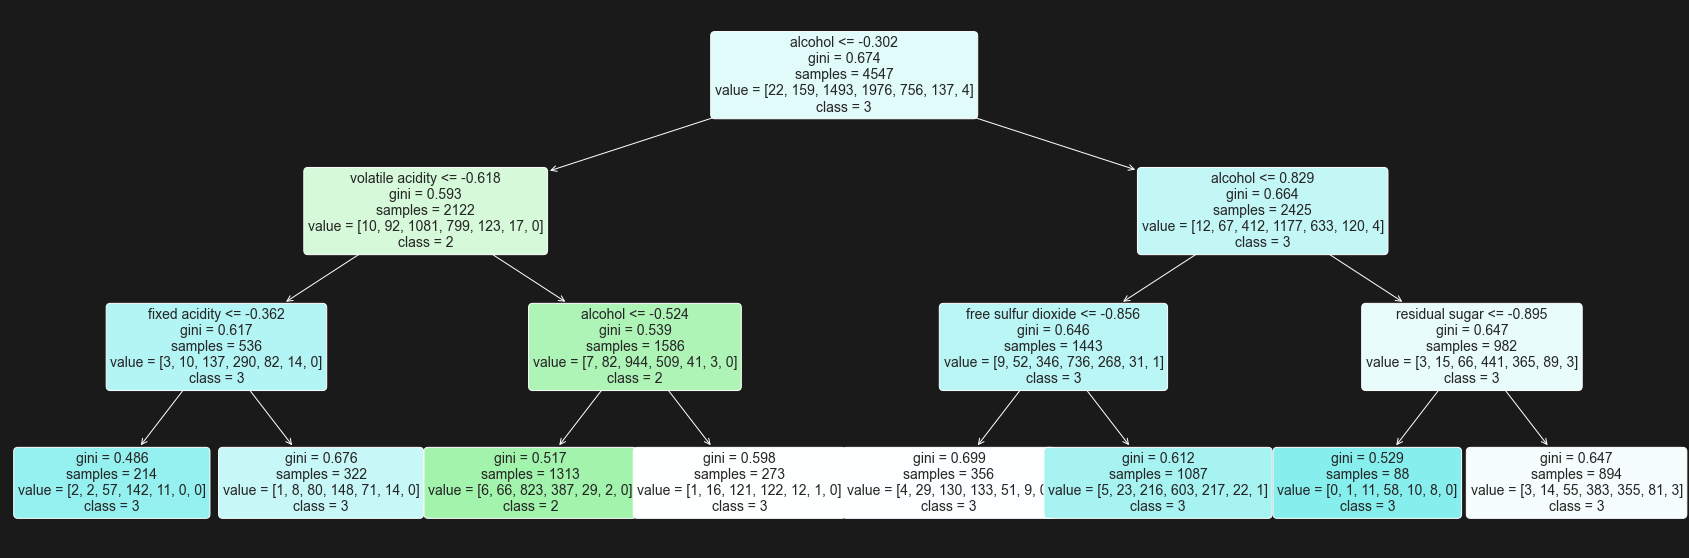

In [207]:
labels_score = df_score["quality"].unique()
label__modified = df_modified["quality"].unique()
#import relevant packages
from sklearn import tree
#plt the figure, setting a black background
plt.figure(figsize=(30,10), facecolor ='k')
#create the tree plot
a = tree.plot_tree(tree_clf1,
                   #use the feature names stored
                   feature_names = X_score_train.columns,
                   #use the class names stored
                   class_names = {0:"0", 1:"1", 2:"2", 3:"3",4:"4", 5:"5", 6:"6", 7:"7", 8:"8", 9:"9"},
                   rounded = True,
                   filled = True,
                   fontsize=14)
#show the plot
plt.show()

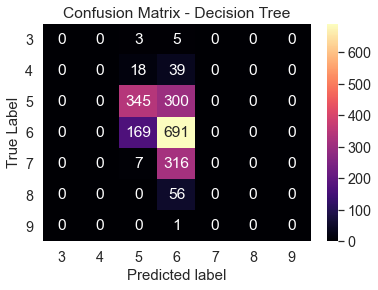

<Figure size 720x504 with 0 Axes>

In [232]:
from sklearn import metrics
test_pred_decision_tree = tree_clf1.predict(X_score_test_scaled)
#get the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_score_test,  
                                            test_pred_decision_tree, labels = [3, 4, 5, 6, 7, 8, 9])
#turn this into a dataframe
matrix_df = pd.DataFrame(confusion_matrix)
#plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")
#set axis titles
ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_xticklabels([3, 4, 5, 6, 7, 8, 9], rotation = 0)
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels([3, 4, 5, 6, 7, 8, 9], rotation = 0)
plt.show()

In [233]:
print(metrics.classification_report(y_score_test,
                                    test_pred_decision_tree))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00        57
           5       0.64      0.53      0.58       645
           6       0.49      0.80      0.61       860
           7       0.00      0.00      0.00       323
           8       0.00      0.00      0.00        56
           9       0.00      0.00      0.00         1

    accuracy                           0.53      1950
   macro avg       0.16      0.19      0.17      1950
weighted avg       0.43      0.53      0.46      1950



D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Populating the interactive namespace from numpy and matplotlib


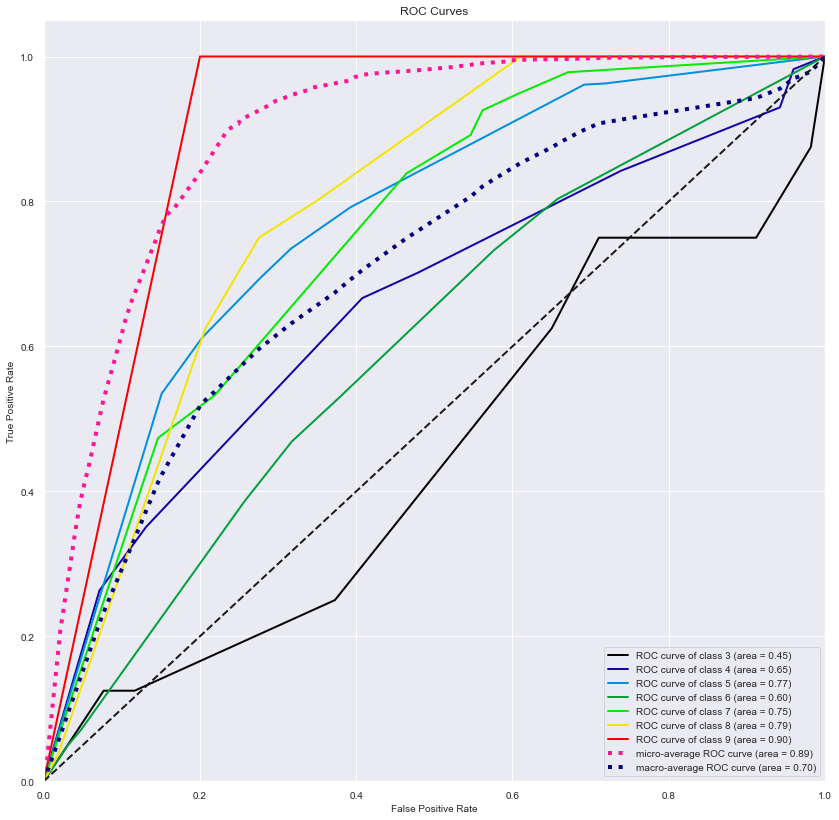

In [304]:
import scikitplot as skplt
tree_clf1.fit(X_score_train_scaled, y_score_train)
probas = tree_clf1.predict_proba(X_score_test_scaled)

# Now plot.
%pylab inline
pylab.rcParams['figure.figsize'] = (14, 14)
skplt.metrics.plot_roc(y_score_test, probas)
plt.show()

### 3.1.2 modified method

In [213]:
tree_clf2 = DecisionTreeClassifier(max_depth =3, random_state = 42)
tree_clf2.fit(X_modified_train_scaled, y_modified_train)
display(tree_clf2.score(X_modified_test_scaled, y_modified_test))

0.7774358974358975

77.7% accuracy

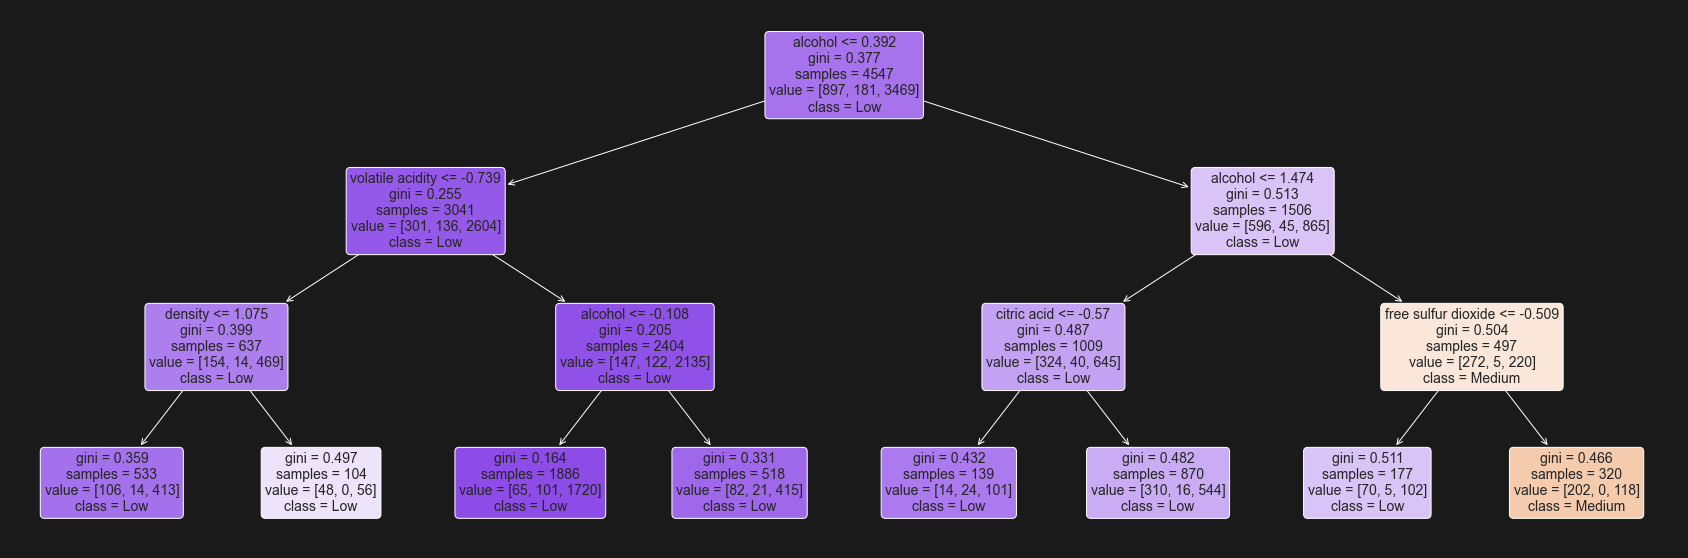

In [189]:
#import relevant packages
from sklearn import tree
#plt the figure, setting a black background
plt.figure(figsize=(30,10), facecolor ='k')
#create the tree plot
a = tree.plot_tree(tree_clf2,
                   #use the feature names stored
                   feature_names = X_modified_train.columns,
                   #use the class names stored
                   class_names = y_modified.unique(),
                   rounded = True,
                   filled = True,
                   fontsize=14)
#show the plot
plt.show()

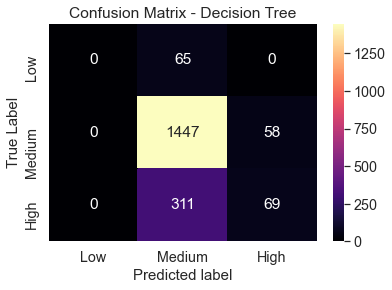

<Figure size 720x504 with 0 Axes>

In [234]:
test_pred_decision_tree = tree_clf2.predict(X_modified_test_scaled)
#get the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_modified_test,  
                                            test_pred_decision_tree, labels = ["Low", "Medium", "High"])
#turn this into a dataframe
matrix_df = pd.DataFrame(confusion_matrix)
#plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")
#set axis titles
ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_xticklabels(["Low", "Medium", "High"])
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(["Low", "Medium", "High"])
plt.show()

In [192]:
print(metrics.classification_report(y_modified_test,
                                    test_pred_decision_tree))

              precision    recall  f1-score   support

        High       0.54      0.18      0.27       380
         Low       0.00      0.00      0.00        65
      Medium       0.79      0.96      0.87      1505

    accuracy                           0.78      1950
   macro avg       0.45      0.38      0.38      1950
weighted avg       0.72      0.78      0.72      1950



D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Populating the interactive namespace from numpy and matplotlib


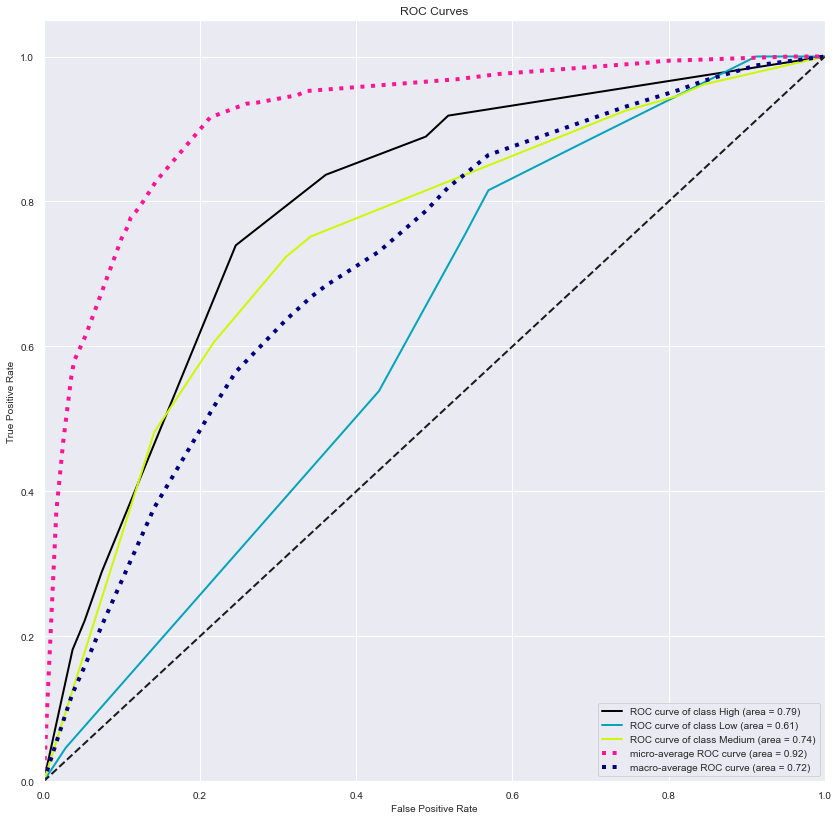

In [295]:
import scikitplot as skplt
tree_clf2.fit(X_modified_train_scaled, y_modified_train)
probas = tree_clf2.predict_proba(X_modified_test_scaled)

# Now plot.
%pylab inline
pylab.rcParams['figure.figsize'] = (14, 14)
skplt.metrics.plot_roc(y_modified_test, probas)
plt.show()

## 3.2 KNN

### 3.2.1 score method

Select best K value

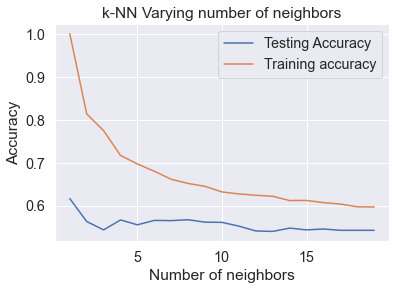

In [255]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = np.arange(1,20)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_score_train_scaled, y_score_train)
    train_accuracy[i] = knn.score(X_score_train_scaled, y_score_train) #use training set for accuracy
    test_accuracy[i] = knn.score(X_score_test_scaled, y_score_test) #use testing set for accuracy
import matplotlib.pyplot as plt
%matplotlib inline
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

when K == 1, the model achieves best prediction accuracy in test set.

In [257]:
neigh1 = KNeighborsClassifier(n_neighbors=1)
neigh1.fit(X_score_train_scaled, y_score_train)
display(neigh1.score(X_score_test_scaled, y_score_test))

0.6164102564102564

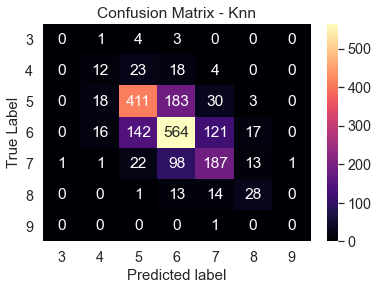

<Figure size 720x504 with 0 Axes>

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         8
           4       0.25      0.21      0.23        57
           5       0.68      0.64      0.66       645
           6       0.64      0.66      0.65       860
           7       0.52      0.58      0.55       323
           8       0.46      0.50      0.48        56
           9       0.00      0.00      0.00         1

    accuracy                           0.62      1950
   macro avg       0.37      0.37      0.37      1950
weighted avg       0.62      0.62      0.62      1950



In [259]:
from sklearn import metrics
test_pred_knn = neigh1.predict(X_score_test_scaled)
#get the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_score_test,  
                                            test_pred_knn, labels = [3, 4, 5, 6, 7, 8, 9])
#turn this into a dataframe
matrix_df = pd.DataFrame(confusion_matrix)
#plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")
#set axis titles
ax.set_title('Confusion Matrix - Knn')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_xticklabels([3, 4, 5, 6, 7, 8, 9], rotation = 0)
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels([3, 4, 5, 6, 7, 8, 9], rotation = 0)
plt.show()
print(metrics.classification_report(y_score_test,
                                    test_pred_knn))

Populating the interactive namespace from numpy and matplotlib


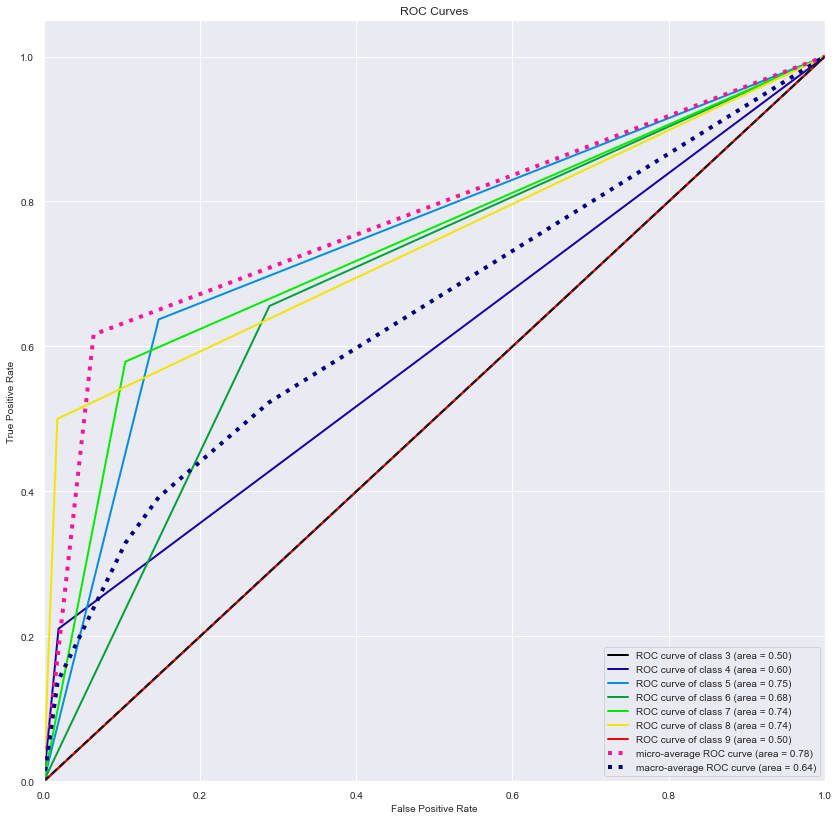

In [297]:
probas = neigh1.predict_proba(X_score_test_scaled)
# Now plot.
%pylab inline
pylab.rcParams['figure.figsize'] = (14, 14)
skplt.metrics.plot_roc(y_score_test, probas)
plt.show()

### 3.2.2 modified method

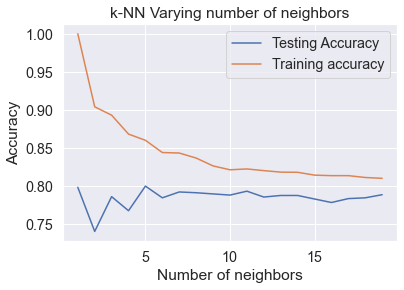

In [261]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = np.arange(1,20)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_modified_train_scaled, y_modified_train)
    train_accuracy[i] = knn.score(X_modified_train_scaled, y_modified_train)
    test_accuracy[i] = knn.score(X_modified_test_scaled, y_modified_test)
import matplotlib.pyplot as plt
%matplotlib inline
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

Best k is 5, since test set has best prediction result here. Also we are avoiding training set accuracy getting too high, it will bring in the overfitting problem.

In [279]:
neigh2 = KNeighborsClassifier(n_neighbors=5)
neigh2.fit(X_modified_train_scaled, y_modified_train)
display(neigh2.score(X_modified_test_scaled, y_modified_test))

0.8

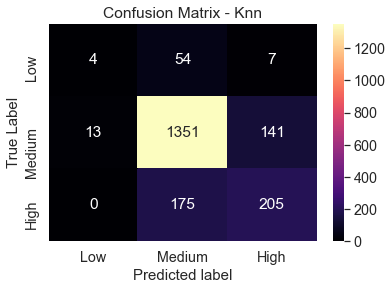

<Figure size 720x504 with 0 Axes>

              precision    recall  f1-score   support

        High       0.58      0.54      0.56       380
         Low       0.24      0.06      0.10        65
      Medium       0.86      0.90      0.88      1505

    accuracy                           0.80      1950
   macro avg       0.56      0.50      0.51      1950
weighted avg       0.78      0.80      0.79      1950



In [271]:
test_pred_knn = neigh2.predict(X_modified_test_scaled)
#get the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_modified_test,  
                                            test_pred_knn, labels = ["Low", "Medium", "High"])
#turn this into a dataframe
matrix_df = pd.DataFrame(confusion_matrix)
#plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")
#set axis titles
ax.set_title('Confusion Matrix - Knn')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_xticklabels(["Low", "Medium", "High"])
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(["Low", "Medium", "High"])
plt.show()
print(metrics.classification_report(y_modified_test,
                                    test_pred_knn))

Populating the interactive namespace from numpy and matplotlib


D:\Anaconda\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['copy', 'shuffle']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


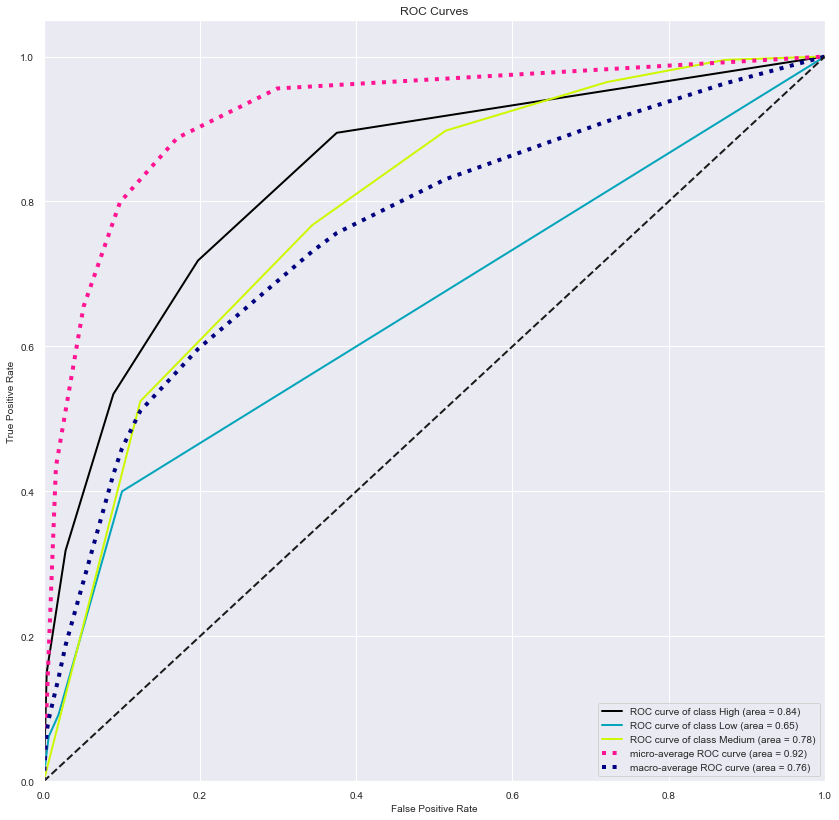

In [294]:
import scikitplot as skplt
neigh2.fit(X_modified_train_scaled, y_modified_train)
probas = neigh2.predict_proba(X_modified_test_scaled)

# Now plot.
%pylab inline
pylab.rcParams['figure.figsize'] = (14, 14)
skplt.metrics.plot_roc(y_modified_test, probas)
plt.show()